In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Key Information 
* K-Means Clustering is an unsupervised machine learning algorithm. 
* K-Means attempts to classify data without having first been trained with labeled data.
* Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

### Use Cases

* profiling customers into distinct segments, based on features
* clustering documents 
* partitioning market into segments
* performing computer vision to identify objects from each other
* astronomy

### Overall goal
* to separate groups into distinct cluster such that the observations belonging to the group are similar

### Procedure
1. select K number of random cluster center, known as centroids
2. assign every point to the randomly chosen centroid
3. after assignment, compute centroid
4. re - assert new centroids overwriting the previously chosen one
4. repeat step 2 till, no further change in association of points to centroid happens

### WCSS
* choosing right value of K is super important
* however visualizing clusters is quite difficult in multi - dimensional space (greater than 2)
* to measure effectiveness of the K, Within Cluster Sum of Square (WCSS) (computed as sum of square of distance between every point to it's cluster) is computed, and plotted against various K values; this results into a curve that shows like an elbow
* ideally, the computation stops where the further changing K value, error does not reduce any further

## Simple Case

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)
# make_blob is a data generator function; effectively we are saying it to generate 200 data points, each data points having 2 features;
# the data points can be grouped in 4 clusters 
# the cluster standard deviation is .6 - to indicate how much a member within the group differs from the mean
X.shape 
# 300 rows with 2 columns each; 
# let's assume that each row indicates a book, with two columns indicating number of pages and number of likes from the users

(300, 2)

In [18]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

The other return value indicates the cluster to which the data points belong to

In [22]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [39]:
y.ndim

1

In [26]:
X.ndim

2

In [27]:
X.size

600

In [58]:
X[:,0] # first feature

array([ 8.36856841e-01, -1.41365810e+00,  1.15521298e+00, -1.01861632e+00,
        1.27135141e+00,  3.43761754e+00, -1.80822253e+00,  1.41372442e+00,
       -2.04932168e-01, -7.11099611e-01, -1.71237268e+00, -2.67000792e+00,
        1.24258802e+00, -2.22783649e+00,  1.45513831e+00,  4.53791789e-01,
        1.06923853e+00,  2.56936589e+00, -1.06690610e+00, -1.07859101e+00,
        2.71506328e+00,  1.77710994e+00,  7.34363910e-01, -1.99648151e+00,
       -1.91828017e+00, -5.55523811e-01,  1.69747910e+00,  5.94762432e-01,
       -2.88024255e+00,  1.86725632e-01, -5.13333436e-01, -2.05701103e+00,
        1.87271752e+00, -1.13121396e+00, -1.64428957e+00, -2.41933824e+00,
       -2.01606928e+00, -2.62142780e+00, -2.20299950e+00,  1.66382237e+00,
        6.69786996e-01, -1.98539037e+00, -4.74920358e-02,  1.54462126e+00,
       -1.70200643e+00, -1.02192525e+00, -1.37842552e+00, -1.55220688e+00,
       -1.47904303e+00,  1.98894313e+00, -1.94972418e+00,  2.45509737e+00,
       -8.94327882e-01,  

In [57]:
X[:,1] # second feature

array([ 2.13635938,  7.40962324,  5.09961887,  7.81491465,  1.89254207,
        0.26165417,  1.59701749,  4.38117707,  8.43209665,  8.66043846,
        2.77780226,  8.3538914 ,  4.50399192,  6.89479938, -0.029199  ,
        3.95647753,  4.53068484,  0.5070483 ,  3.13165795,  2.20451529,
        1.2908219 ,  1.18655254,  5.03725437,  2.85164868,  2.60516867,
        4.69595848,  0.86612328,  4.7096473 ,  2.30437816,  4.02683656,
        7.87437368,  7.37851598,  4.18069237,  6.7665223 ,  7.94095139,
        7.43952498,  7.48420129,  7.98635066,  2.47947561,  0.66309163,
        3.59540802,  2.05520738,  5.47425256,  4.21078127,  2.46098693,
        2.76820711,  8.10269597,  2.74574995,  7.56915836,  1.50976729,
        3.4838387 ,  0.62123179,  7.61714473,  0.75491062,  2.05538289,
        2.8221382 ,  7.80870276,  1.97550822,  7.72830656,  0.92896271,
        7.3020772 ,  4.32288566,  9.28293222,  2.95323761,  3.10677258,
        2.7842772 ,  7.51178724,  0.95071691,  7.84766052,  3.21

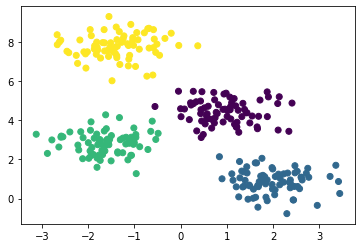

In [56]:
plt.scatter(X[:,0],X[:,1],c=y) # visualizing the data points grouped in 4 clusters

we conclude that there is definitely cohesion between the data points, within the cluster they belong

In [46]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [53]:
y_kmeans.dtype

dtype('int32')

In [52]:
y.dtype

dtype('int64')

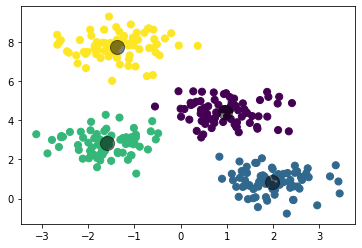

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

at this point, it shows the centers that the alogorithm found for us

### Computation of WCSS

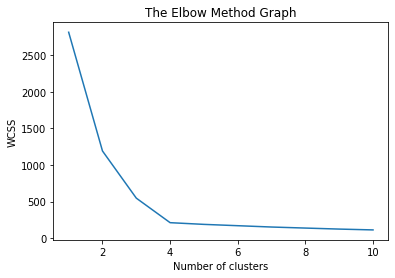

In [65]:
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()        

Above diagram shows that error reduces and stays flattened when the number of cluster reaches 4

### Expectation - Maximization

kmean clustering technique is a demonstration of Expectation - Maximization algorithm.

In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    2. M-Step: set the cluster centers to the mean
    
Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.    

### Example
1. IRIS dataset (Analytics Path) TBD
2. 

References
1. https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
2. https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
3. https://medium.com/analytics-vidhya/comparison-of-initialization-strategies-for-k-means-d5ddd8b0350e
4. https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python (IRIS dataset implementation)
5. https://github.com/andrewxiechina/DataScience/blob/master/K-Means/cs229-notes7a%202.pdf
